In [1]:
from model import BBBC_Model, ModelAnalyzer

In [2]:
models = BBBC_Model(response_var='Choice',train_path='BBBC-Train.csv',test_path='BBBC-Test.csv')

data = models.load_data()
cols = list(data.columns)

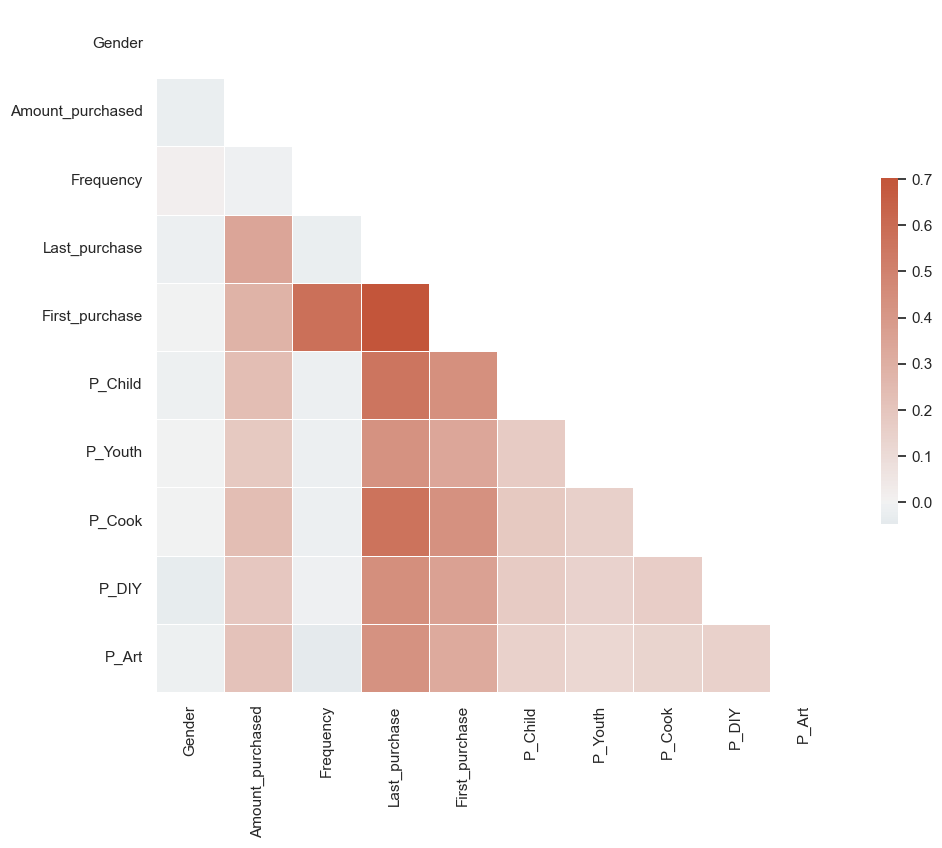

In [3]:
models.analyze_high_cardinality(data=data,columns=cols,threshold=0.9)

models.spearman_correlation(data=data,response_var='Choice')

In [4]:
models.summarize_stats(data=data,response_var='Choice')

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be re

,Variable,Mean difference,Test type,Statistic,P-value,Confidence interval
0,Gender,-0.164122,Satterthwaite t-test,7.522100e+00,0.000000e+00,"[-0.21, -0.12]"
1,Amount_purchased,24.118534,Mann-Whitney U test,8.529820e+05,2.168536e-08,"[15.71, 32.53]"
2,Frequency,-4.408518,Satterthwaite t-test,1.538290e+01,0.000000e+00,"[-4.97, -3.85]"
3,Last_purchase,0.869197,Satterthwaite t-test,-5.910300e+00,0.000000e+00,"[0.58, 1.16]"
4,First_purchase,-0.510898,Satterthwaite t-test,6.713000e-01,5.022000e-01,"[-2.00, 0.98]"
5,P_Child,0.012188,Mann-Whitney U test,1.011378e+06,4.871928e-01,"[-0.08, 0.11]"
6,P_Youth,0.026114,Mann-Whitney U test,9.872015e+05,6.781661e-01,"[-0.03, 0.08]"
7,P_Cook,-0.090463,Mann-Whitney U test,1.040149e+06,5.373174e-02,"[-0.18, -0.00]"
8,P_DIY,-0.040356,Mann-Whitney U test,1.025274e+06,1.456539e-01,"[-0.10, 0.02]"
9,P_Art,0.572309,Satterthwaite t-test,-1.458410e+01,0.000000e+00,"[0.50, 0.65]"


In [5]:
models.select_best_model()

Metrics

Linear regression:
             
mse  0.092551
mae  0.239948

Logistic regression:
                     
accuracy     0.890435
precision    0.382353
recall       0.382353
f1           0.382353
auc          0.800129
specificity  0.939885
sensitivity  0.382353

SVM:
                     
accuracy     0.905652
precision    0.157895
recall       0.014706
f1           0.026906
auc          0.770838
specificity  0.992366
sensitivity  0.014706

Weighted scores
Linear regression, weighted score:  0.16624947902871118
Logistic regression, weighted score:  4.159861374810461
SVM, weighted score:  2.8830689280480137


('logit', LogisticRegression(max_iter=1000))

In [6]:
X_train, X_test, y_train, y_test = models.preprocess_data()

In [7]:
cov = ModelAnalyzer(model_type='linear',X_train=X_train,y_train=y_train)
cov.analyze()
cov.get_covariate_table()

,Covariate,Coefficient,95% CI (Lower),95% CI (Upper)
Gender,Gender,-0.025877,-0.062619,0.010866
Amount_purchased,Amount_purchased,0.001002,0.000813,0.001191
Frequency,Frequency,0.002952,-0.000992,0.006895
Last_purchase,Last_purchase,0.117791,0.090287,0.145295
First_purchase,First_purchase,-0.007403,-0.010999,-0.003807
P_Child,P_Child,-0.118125,-0.151646,-0.084604
P_Youth,P_Youth,-0.086436,-0.127537,-0.045334
P_Cook,P_Cook,-0.134970,-0.168922,-0.101018
P_DIY,P_DIY,-0.127422,-0.167877,-0.086967
P_Art,P_Art,0.127410,0.087672,0.167149


In [8]:
cov = ModelAnalyzer(model_type='logistic',X_train=X_train,y_train=y_train)
cov.analyze()
cov.get_covariate_table()

Optimization terminated successfully.
         Current function value: 0.435889
         Iterations 6


,Covariate,Coefficient,95% CI (Lower),95% CI (Upper)
Gender,Gender,-0.947066,-1.196191,-0.697941
Amount_purchased,Amount_purchased,0.001108,-0.000149,0.002365
Frequency,Frequency,-0.089770,-0.117833,-0.061707
Last_purchase,Last_purchase,0.591887,0.409617,0.774156
First_purchase,First_purchase,-0.009049,-0.033283,0.015186
P_Child,P_Child,-0.820958,-1.049951,-0.591965
P_Youth,P_Youth,-0.652042,-0.933806,-0.370279
P_Cook,P_Cook,-0.932229,-1.166571,-0.697886
P_DIY,P_DIY,-0.915955,-1.197710,-0.634201
P_Art,P_Art,0.683361,0.433160,0.933563


In [9]:
# cov = ModelAnalyzer(model_type='svm',X_train=X_train,y_train=y_train)
# cov.analyze()
# cov.get_covariate_table()

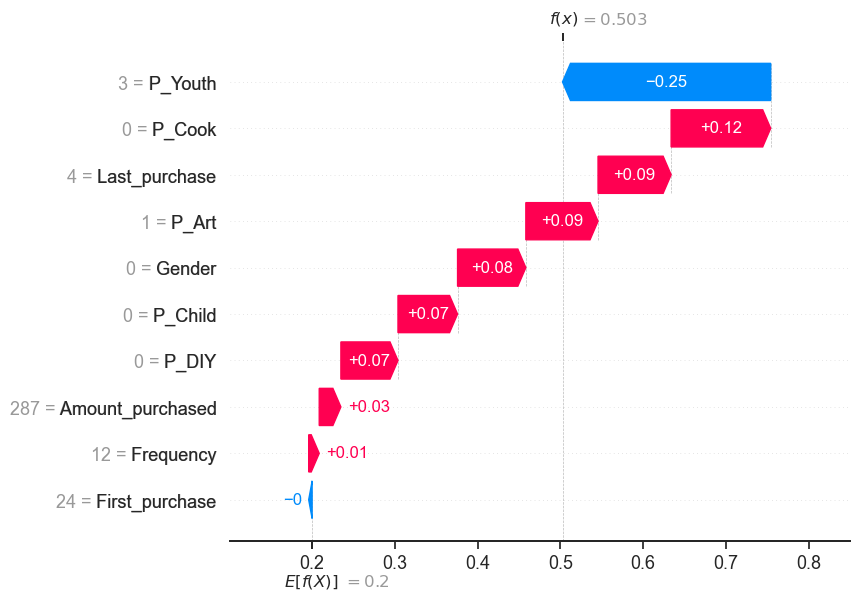

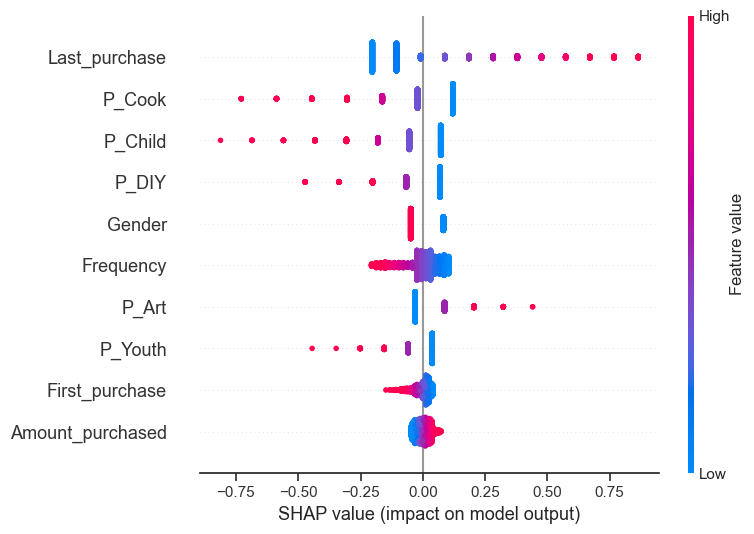

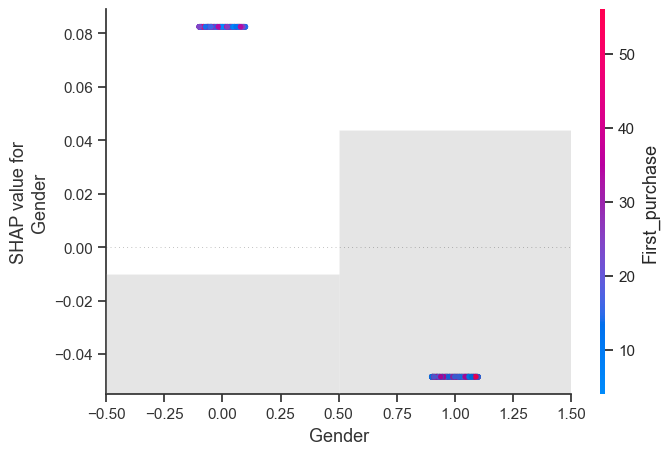

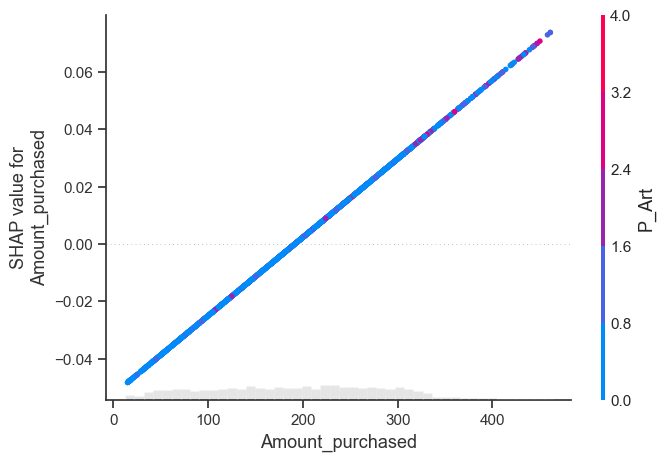

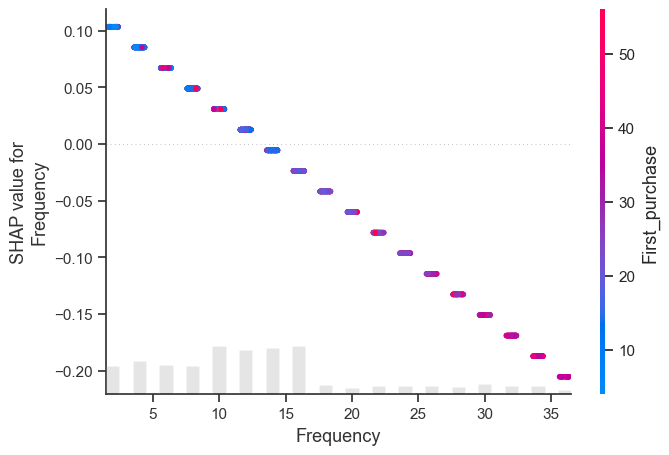

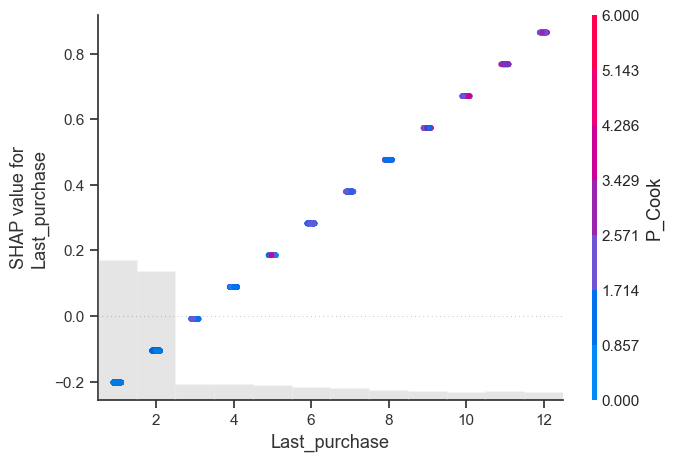

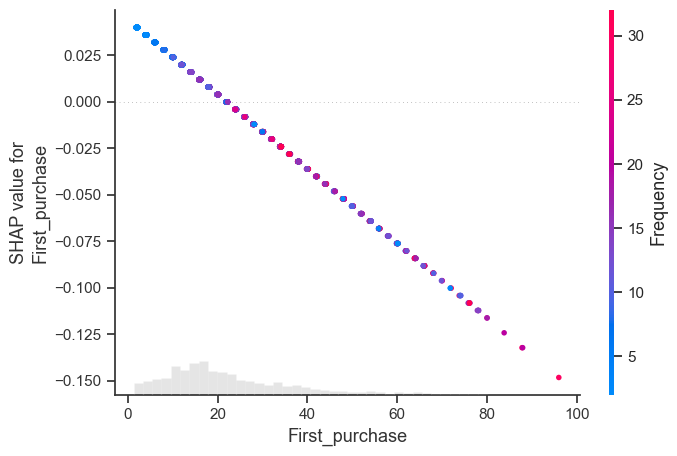

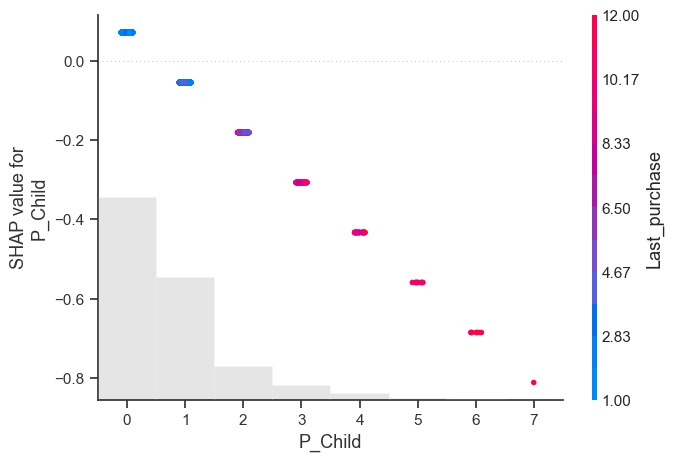

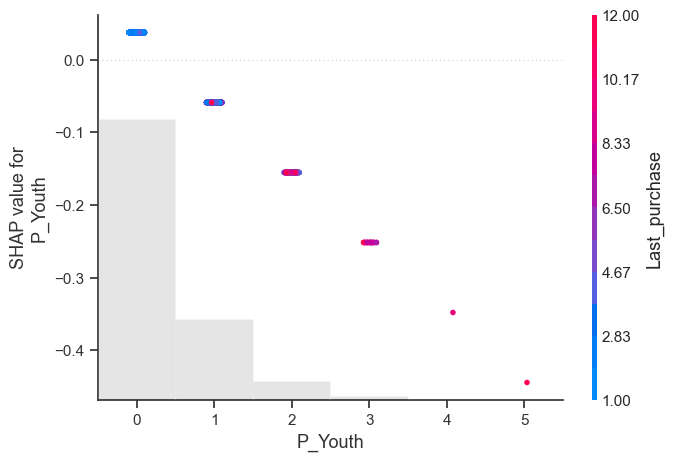

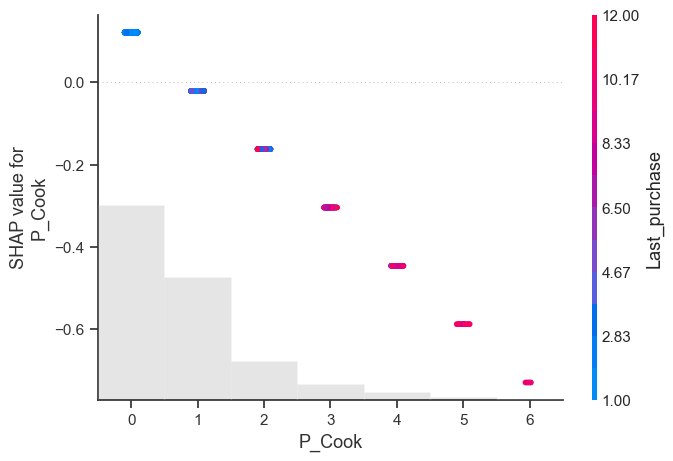

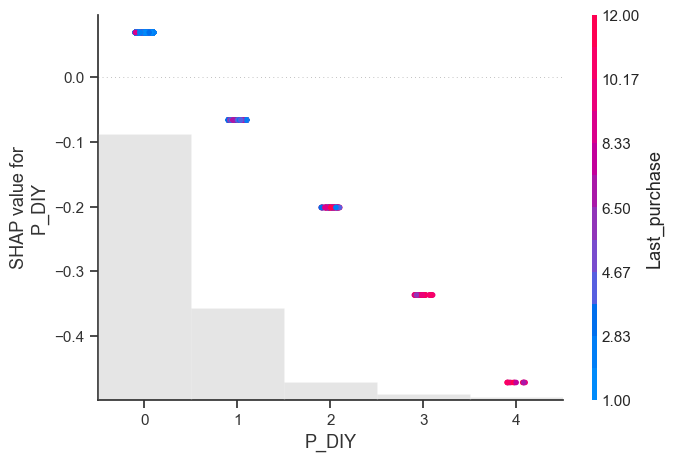

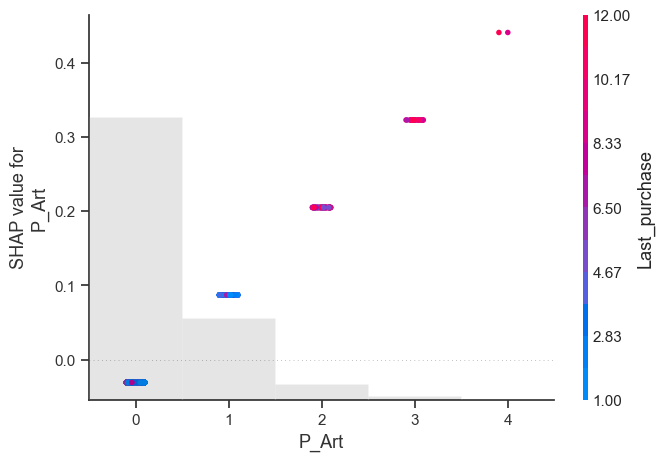

In [10]:
models.shap_analysis(models.build_linear_model(X_train,y_train), X_test=X_test, plot_dependence=True)

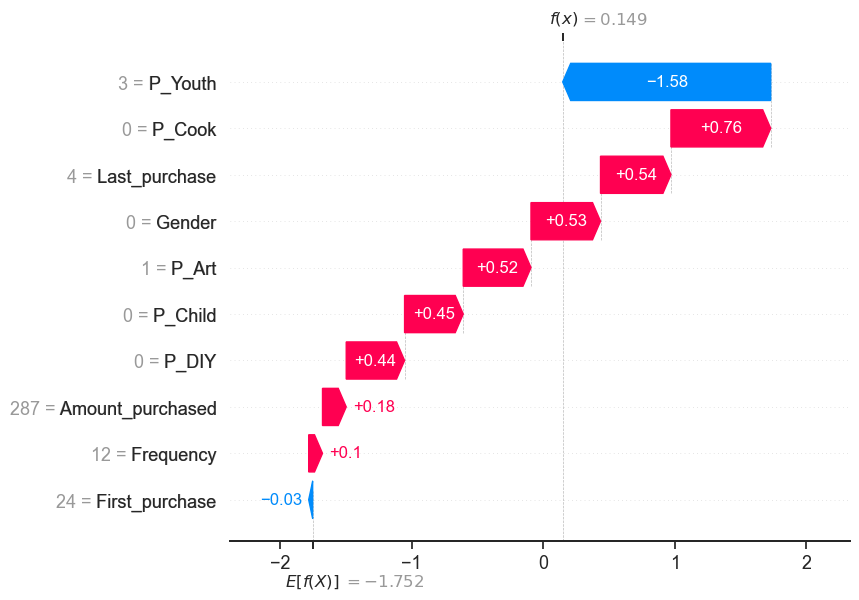

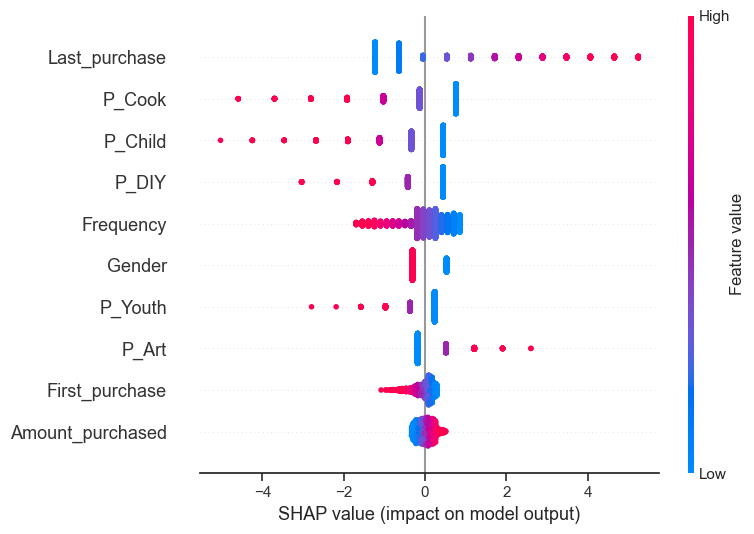

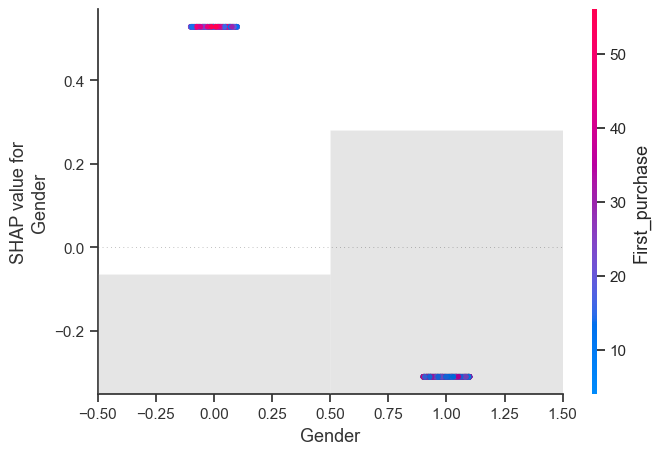

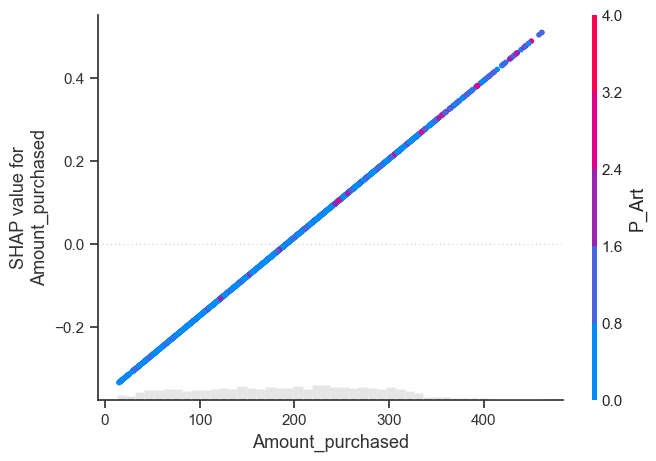

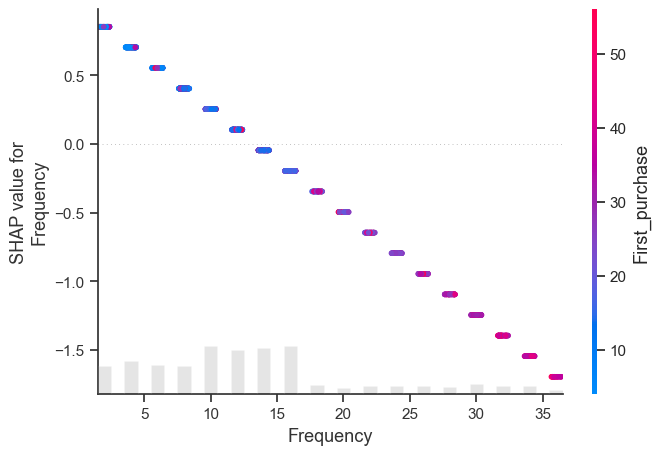

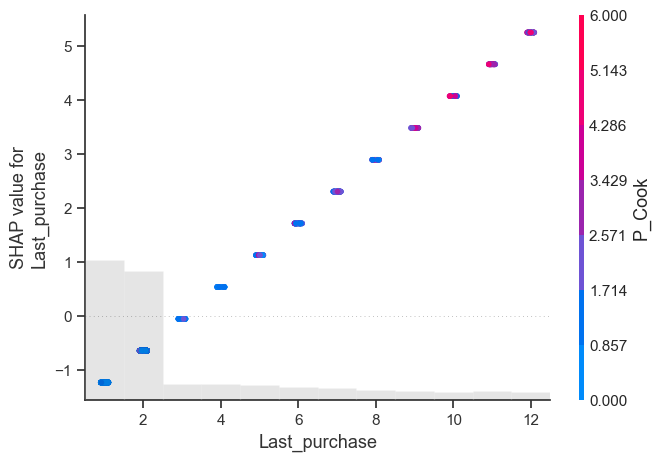

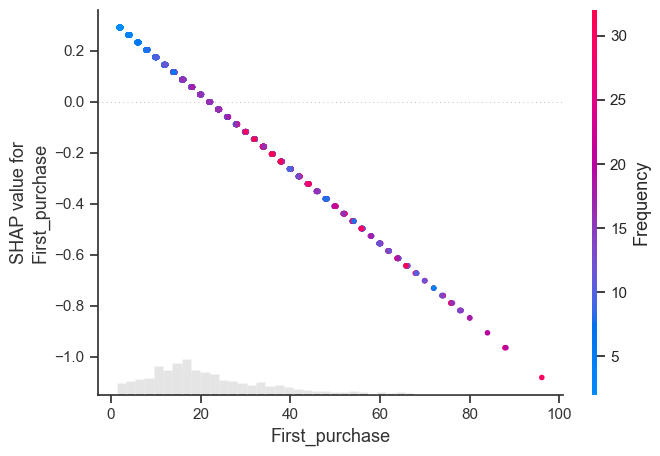

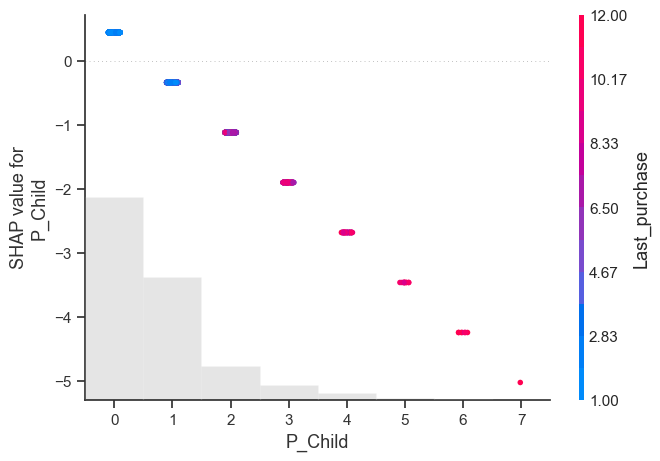

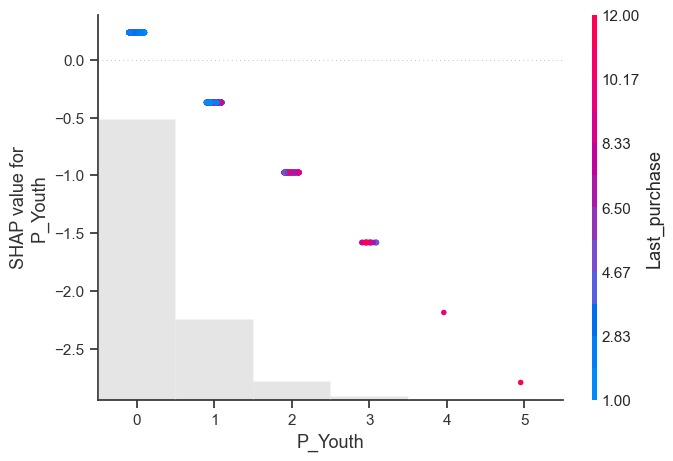

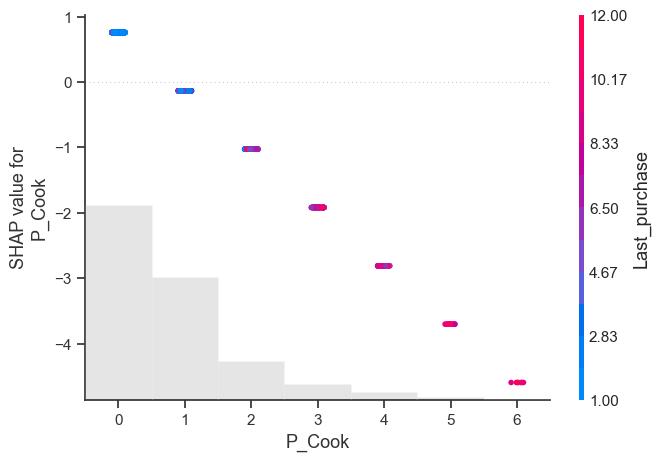

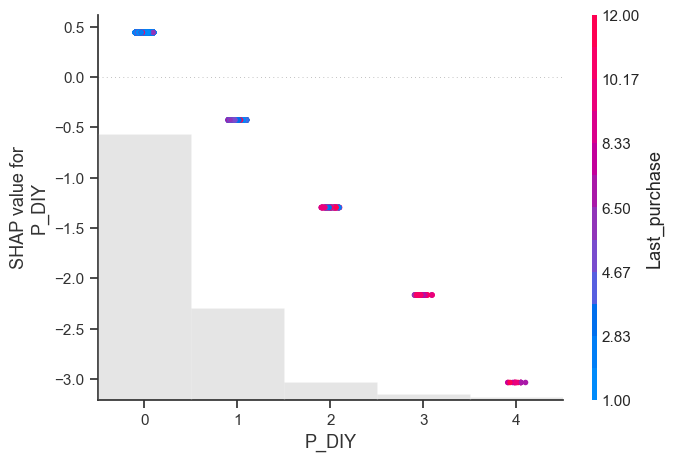

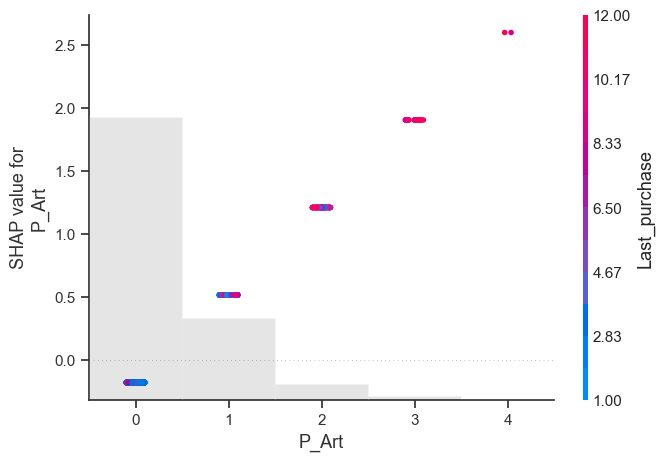

In [11]:
models.shap_analysis(models.build_logit_model(X_train,y_train), X_test=X_test,plot_dependence=True)

In [12]:
# # Train an SVM model
# import shap
# svm_model = models.build_svm_model(X_train,y_train)

# # Initialize the SHAP explainer
# explainer = shap.KernelExplainer(lambda x: svm_model.decision_function(x), X_train)
# explainer.feature_names = list(X_train.columns)

# # Compute SHAP values for the test data
# shap_values = explainer.shap_values(X_test)

# # Visualize the SHAP values
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])